### **Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')
import base64
import io
from matplotlib.pyplot import imread
import codecs
from IPython.display import HTML

### **Import the dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

In [2]:
import io
ww = pd.read_json('chunk21.json')

## **Data Exploration & Cleaning**

In [3]:
ww

,Unnamed: 0,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,2000000,quant-ph/9502029,Juan Pablo,W. H. Zurek and J. P. Paz,Quantum chaos: a decoherent definition.,"uses jnl macro, 1 figure available upon reques...",None,10.1016/0167-2789(94)00271-Q,None,quant-ph,None,We show that the rate of increase of von Neu...,"[{'version': 'v1', 'created': 'Tue, 28 Feb 199...",2015-06-26,"[['Zurek', 'W. H.', ''], ['Paz', 'J. P.', '']]"
1,2000001,quant-ph/9503001,None,"Roberto Onofrio, Giovanni Carugno",Detecting Casimir Forces through a Tunneling E...,"10 pages, revtex, 4 figures (not included)",Phys. Lett. A198 (1995) 365,10.1016/0375-9601(95)00073-C,DFPD 95/GP/64,quant-ph,None,We propose the use of a tunneling electromec...,"[{'version': 'v1', 'created': 'Wed, 1 Mar 1995...",2016-09-08,"[['Onofrio', 'Roberto', ''], ['Carugno', 'Giov..."
2,2000002,quant-ph/9503002,Luanne Neumann,Takahiro Kawai and Henry P. Stapp,Quantum Electrodynamics at Large Distances I: ...,"55 pages, 3 Figures included as uuencoded, gzi...",Phys.Rev. D52 (1995) 2484-2504,10.1103/PhysRevD.52.2484,LBL-35971,quant-ph,None,The correspondence principle is important in...,"[{'version': 'v1', 'created': 'Wed, 1 Mar 1995...",2016-09-08,"[['Kawai', 'Takahiro', ''], ['Stapp', 'Henry P..."
3,2000003,quant-ph/9503003,None,Lajos Diosi,"Comment on 'Quantum Backreaction on ""Classical...","3 pages, LaTex",Phys.Rev.Lett. 76 (1996) 4088,10.1103/PhysRevLett.76.4088,None,quant-ph,None,It is argued that the bracket of Anderson's ...,"[{'version': 'v1', 'created': 'Thu, 2 Mar 1995...",2016-09-08,"[['Diosi', 'Lajos', '']]"
4,2000004,quant-ph/9503004,Hagen Kleinert,H. Kleinert and S.V. Shabanov (Freie Universit...,Quantum Langevin equation from forward--backwa...,None,Phys.Lett. A200 (1995) 224-232,10.1016/0375-9601(95)00169-4,None,quant-ph cond-mat hep-th,None,The quantum Langevin equation is derived fro...,"[{'version': 'v1', 'created': 'Thu, 2 Mar 1995...",2016-08-15,"[['Kleinert', 'H.', '', 'Freie Universität Ber..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,2004639,supr-con/9608008,Ruslan Prozorov,"R. Prozorov, M. Konczykowski, B. Schmidt, Y. Y...",On the origin of the irreversibility line in t...,"19 pages, LaTex, 6 PostScript figures; Author'...",None,10.1103/PhysRevB.54.15530,None,supr-con cond-mat.supr-con,None,We report on measurements of the angular dep...,"[{'version': 'v1', 'created': 'Mon, 26 Aug 199...",2009-10-30,"[['Prozorov', 'R.', ''], ['Konczykowski', 'M.'..."
4640,2004640,supr-con/9609001,Durga P. Choudhury,"Durga P. Choudhury, Balam A. Willemsen, John S...",Nonlinear Response of HTSC Thin Film Microwave...,"4 pages, LaTeX type, Uses IEEE style files, 60...",None,10.1109/77.620744,None,supr-con cond-mat.supr-con,None,The non-linear microwave surface impedance o...,"[{'version': 'v1', 'created': 'Sat, 31 Aug 199...",2016-11-18,"[['Choudhury', 'Durga P.', '', 'Physics Depart..."
4641,2004641,supr-con/9609002,Durga P. Choudhury,"Balam A. Willemsen, J. S. Derov and S.Sridhar ...",Critical State Flux Penetration and Linear Mic...,"20 pages, LaTeX type, Uses REVTeX style files,...",None,10.1103/PhysRevB.56.11989,None,supr-con cond-mat.supr-con,None,The vortex contribution to the dc field (H) ...,"[{'version': 'v1', 'created': 'Tue, 3 Sep 1996...",2009-10-30,"[['Willemsen', 'Balam A.', '', 'Physics Depart..."
4642,2004642,supr-con/9609003,Hasegawa Yasumasa,Yasumasa Hasegawa (Himeji Institute of Technol...,Density of States and NMR Relaxation Rate in A...,"7 pages, 4 PostScript Figures, LaTeX, to appea...",None,10.1143/JPSJ.65.3131,None,supr-con cond-mat.supr-con,None,We show that the density of states in an ani...,"[{'version': 'v1', 'created': 'Wed, 18 Sep 199...",2009-10-30,"[['Hasegawa', 'Yasumasa', '', 'Himeji Institut..."


In [4]:
ww[ww['submitter'] == 'Ruslan Prozorov'].index[0]

4639

In [5]:
ww.describe()

,Unnamed: 0
count,4.644000e+03
mean,2.002322e+06
std,1.340752e+03
min,2.000000e+06
25%,2.001161e+06
50%,2.002322e+06
75%,2.003482e+06
max,2.004643e+06


**Converting JSON into strings**

In [6]:
# changing the genres column from json to string
#ww['categories'] = ww['categories'].apply(json.loads)
for index,i in zip(ww.index,ww['categories']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the genre
    ww.loc[index,'categories'] = str(list1)
    

# changing the keywords column from json to string
#ww['title'] = ww['title'].apply(json.loads)
for index,i in zip(ww.index,ww['title']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    ww.loc[index,'title'] = str(list1)
'''  
# changing the production_companies column from json to string
ww['production_companies'] = ww['production_companies'].apply(json.loads)
for index,i in zip(ww.index,ww['production_companies']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    ww.loc[index,'production_companies'] = str(list1)
'''
# changing the cast column from json to string
#ww['authors'] = ww['authors'].apply(json.loads)
for index,i in zip(ww.index,ww['authors']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    ww.loc[index,'authors'] = str(list1)
    

# changing the crew column from json to string    
#ww['submitter'] = ww['submitter'].apply(json.loads)
for index,i in zip(ww.index,ww['submitter']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    ww.loc[index,'submitter'] = str(list1)

TypeError: ignored

In [7]:
ww.head()

,Unnamed: 0,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,2000000,quant-ph/9502029,Juan Pablo,W. H. Zurek and J. P. Paz,Quantum chaos: a decoherent definition.,"uses jnl macro, 1 figure available upon reques...",None,10.1016/0167-2789(94)00271-Q,None,quant-ph,None,We show that the rate of increase of von Neu...,"[{'version': 'v1', 'created': 'Tue, 28 Feb 199...",2015-06-26,"[['Zurek', 'W. H.', ''], ['Paz', 'J. P.', '']]"
1,2000001,quant-ph/9503001,None,"Roberto Onofrio, Giovanni Carugno",Detecting Casimir Forces through a Tunneling E...,"10 pages, revtex, 4 figures (not included)",Phys. Lett. A198 (1995) 365,10.1016/0375-9601(95)00073-C,DFPD 95/GP/64,quant-ph,None,We propose the use of a tunneling electromec...,"[{'version': 'v1', 'created': 'Wed, 1 Mar 1995...",2016-09-08,"[['Onofrio', 'Roberto', ''], ['Carugno', 'Giov..."
2,2000002,quant-ph/9503002,Luanne Neumann,Takahiro Kawai and Henry P. Stapp,Quantum Electrodynamics at Large Distances I: ...,"55 pages, 3 Figures included as uuencoded, gzi...",Phys.Rev. D52 (1995) 2484-2504,10.1103/PhysRevD.52.2484,LBL-35971,quant-ph,None,The correspondence principle is important in...,"[{'version': 'v1', 'created': 'Wed, 1 Mar 1995...",2016-09-08,"[['Kawai', 'Takahiro', ''], ['Stapp', 'Henry P..."
3,2000003,quant-ph/9503003,None,Lajos Diosi,"Comment on 'Quantum Backreaction on ""Classical...","3 pages, LaTex",Phys.Rev.Lett. 76 (1996) 4088,10.1103/PhysRevLett.76.4088,None,quant-ph,None,It is argued that the bracket of Anderson's ...,"[{'version': 'v1', 'created': 'Thu, 2 Mar 1995...",2016-09-08,"[['Diosi', 'Lajos', '']]"
4,2000004,quant-ph/9503004,Hagen Kleinert,H. Kleinert and S.V. Shabanov (Freie Universit...,Quantum Langevin equation from forward--backwa...,None,Phys.Lett. A200 (1995) 224-232,10.1016/0375-9601(95)00169-4,None,quant-ph cond-mat hep-th,None,The quantum Langevin equation is derived fro...,"[{'version': 'v1', 'created': 'Thu, 2 Mar 1995...",2016-08-15,"[['Kleinert', 'H.', '', 'Freie Universität Ber..."


In [8]:
ww.iloc[0]

Unnamed: 0                                                  2000000
id                                                 quant-ph/9502029
submitter                                                Juan Pablo
authors                                   W. H. Zurek and J. P. Paz
title                       Quantum chaos: a decoherent definition.
comments          uses jnl macro, 1 figure available upon reques...
journal-ref                                                    None
doi                                    10.1016/0167-2789(94)00271-Q
report-no                                                      None
categories                                                 quant-ph
license                                                        None
abstract            We show that the rate of increase of von Neu...
versions          [{'version': 'v1', 'created': 'Tue, 28 Feb 199...
update_date                                              2015-06-26
authors_parsed       [['Zurek', 'W. H.', ''], ['

In [9]:
ww = ww.drop('comments',1)
ww = ww.drop('doi',1)
ww = ww.drop('report-no',1)
ww = ww.drop('license',1)
ww = ww.drop('versions',1)
ww = ww.drop('update_date',1)
ww = ww.drop('Unnamed: 0',1)

In [10]:
ww

,id,submitter,authors,title,journal-ref,categories,abstract,authors_parsed
0,quant-ph/9502029,Juan Pablo,W. H. Zurek and J. P. Paz,Quantum chaos: a decoherent definition.,None,quant-ph,We show that the rate of increase of von Neu...,"[['Zurek', 'W. H.', ''], ['Paz', 'J. P.', '']]"
1,quant-ph/9503001,None,"Roberto Onofrio, Giovanni Carugno",Detecting Casimir Forces through a Tunneling E...,Phys. Lett. A198 (1995) 365,quant-ph,We propose the use of a tunneling electromec...,"[['Onofrio', 'Roberto', ''], ['Carugno', 'Giov..."
2,quant-ph/9503002,Luanne Neumann,Takahiro Kawai and Henry P. Stapp,Quantum Electrodynamics at Large Distances I: ...,Phys.Rev. D52 (1995) 2484-2504,quant-ph,The correspondence principle is important in...,"[['Kawai', 'Takahiro', ''], ['Stapp', 'Henry P..."
3,quant-ph/9503003,None,Lajos Diosi,"Comment on 'Quantum Backreaction on ""Classical...",Phys.Rev.Lett. 76 (1996) 4088,quant-ph,It is argued that the bracket of Anderson's ...,"[['Diosi', 'Lajos', '']]"
4,quant-ph/9503004,Hagen Kleinert,H. Kleinert and S.V. Shabanov (Freie Universit...,Quantum Langevin equation from forward--backwa...,Phys.Lett. A200 (1995) 224-232,quant-ph cond-mat hep-th,The quantum Langevin equation is derived fro...,"[['Kleinert', 'H.', '', 'Freie Universität Ber..."
...,...,...,...,...,...,...,...,...
4639,supr-con/9608008,Ruslan Prozorov,"R. Prozorov, M. Konczykowski, B. Schmidt, Y. Y...",On the origin of the irreversibility line in t...,None,supr-con cond-mat.supr-con,We report on measurements of the angular dep...,"[['Prozorov', 'R.', ''], ['Konczykowski', 'M.'..."
4640,supr-con/9609001,Durga P. Choudhury,"Durga P. Choudhury, Balam A. Willemsen, John S...",Nonlinear Response of HTSC Thin Film Microwave...,None,supr-con cond-mat.supr-con,The non-linear microwave surface impedance o...,"[['Choudhury', 'Durga P.', '', 'Physics Depart..."
4641,supr-con/9609002,Durga P. Choudhury,"Balam A. Willemsen, J. S. Derov and S.Sridhar ...",Critical State Flux Penetration and Linear Mic...,None,supr-con cond-mat.supr-con,The vortex contribution to the dc field (H) ...,"[['Willemsen', 'Balam A.', '', 'Physics Depart..."
4642,supr-con/9609003,Hasegawa Yasumasa,Yasumasa Hasegawa (Himeji Institute of Technol...,Density of States and NMR Relaxation Rate in A...,None,supr-con cond-mat.supr-con,We show that the density of states in an ani...,"[['Hasegawa', 'Yasumasa', '', 'Himeji Institut..."


In [11]:
ww.shape

(4644, 8)

In [12]:
ww.size

37152

In [13]:
ww.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4634, 4635, 4636, 4637, 4638, 4639, 4640, 4641, 4642, 4643],
           dtype='int64', length=4644)

In [14]:
ww.columns

Index(['id', 'submitter', 'authors', 'title', 'journal-ref', 'categories',
       'abstract', 'authors_parsed'],
      dtype='object')

In [15]:
ww.dtypes

id                object
submitter         object
authors           object
title             object
journal-ref       object
categories        object
abstract          object
authors_parsed    object
dtype: object

In [16]:
ww1=ww.loc[ww['categories'].str.startswith('quant')]
ww1['newcat'] = 'quant'
df1 = pd.DataFrame(ww1)
df1

ww2 = ww.loc[ww['categories'].str.startswith('supr')]
ww2['newcat'] = 'supr'
df2 = pd.DataFrame(ww2)
df2

ww3=ww.loc[ww['categories'].str.startswith('solv')]
ww3['newcat'] = 'solv'
df3 = pd.DataFrame(ww3)
df3

,id,submitter,authors,title,journal-ref,categories,abstract,authors_parsed,newcat
3731,solv-int/9304001,Jarmo Hietarinta,"Kenji Kajiwara (Department of Applied Physics,...",q-Discrete Toda Molecule Equation,None,solv-int hep-th nlin.SI,A q-discrete version of the two-dimensional ...,"[['Kajiwara', 'Kenji', '', 'Department of Appl...",solv
3732,solv-int/9304002,Kaji,Yasuhiro Ohta (Research Institute for Mathemat...,Casorati Determinant Solution for the Relativi...,None,solv-int nlin.SI,The relativistic Toda lattice equation is de...,"[['Ohta', 'Yasuhiro', '', 'Research Institute ...",solv
3733,solv-int/9304003,Robert I. McLachlan,Robert I. McLachlan (Program in Applied Mathem...,Integrable four-dimensional symplectic maps of...,None,solv-int nlin.SI,"We search for rational, four-dimensional map...","[['McLachlan', 'Robert I.', '', 'Program in Ap...",solv
3734,solv-int/9305001,None,Ziemowit Popowicz (Research Institute for Theo...,The Super W_3 Conformal Algebra and the Boussi...,None,solv-int nlin.SI,The bihamiltonian structure of the N=2 Super...,"[['Popowicz', 'Ziemowit', '', 'Research Instit...",solv
3735,solv-int/9305002,Jeremy Schiff,Jeremy Schiff,"B\""acklund Transformations of MKdV and Painlev...",None,solv-int nlin.SI,For $N\ge 3$ there are $S_N$ and $D_N$ actio...,"[['Schiff', 'Jeremy', '']]",solv
...,...,...,...,...,...,...,...,...,...
4570,solv-int/9912012,Mark B. Mineev-Weinstein,Mark Mineev-Weinstein and Anton Zabrodin,Whitham-Toda Hierarchy in the Laplacian Growth...,"J.Nonlin.Math.Phys.8:212-218,2001",solv-int cond-mat.stat-mech hep-th nlin.PS nli...,The Laplacian growth problem in the limit of...,"[['Mineev-Weinstein', 'Mark', ''], ['Zabrodin'...",solv
4571,solv-int/9912013,L. A. Kalyakin,"L.A.Kalyakin (Institute of Mathematics, Ufa Sc...",Singular solution of the Liouville equation un...,None,solv-int nlin.SI,Small perturbation of the Liouville equation...,"[['Kalyakin', 'L. A.', '', 'Institute of Mathe...",solv
4572,solv-int/9912014,Pierre van Moerbeke,Mark Adler and Pierre van Moerbeke,Vertex operator solutions to the discrete KP-h...,"Comm. Math. Phys., 203, 185--210 (1999)",solv-int nlin.SI,"Vertex operators, which are disguised Darbou...","[['Adler', 'Mark', ''], ['van Moerbeke', 'Pier...",solv
4573,solv-int/9912015,Harold Blas,Harold Blas,Vector NLS hierarchy solitons revisited: dress...,None,solv-int hep-th math-ph math.MP nlin.SI,We discuss some algebraic aspects of the int...,"[['Blas', 'Harold', '']]",solv


In [17]:
frames = [df1,df2,df3]
result = pd.concat(frames)
display(result)

,id,submitter,authors,title,journal-ref,categories,abstract,authors_parsed,newcat
0,quant-ph/9502029,Juan Pablo,W. H. Zurek and J. P. Paz,Quantum chaos: a decoherent definition.,None,quant-ph,We show that the rate of increase of von Neu...,"[['Zurek', 'W. H.', ''], ['Paz', 'J. P.', '']]",quant
1,quant-ph/9503001,None,"Roberto Onofrio, Giovanni Carugno",Detecting Casimir Forces through a Tunneling E...,Phys. Lett. A198 (1995) 365,quant-ph,We propose the use of a tunneling electromec...,"[['Onofrio', 'Roberto', ''], ['Carugno', 'Giov...",quant
2,quant-ph/9503002,Luanne Neumann,Takahiro Kawai and Henry P. Stapp,Quantum Electrodynamics at Large Distances I: ...,Phys.Rev. D52 (1995) 2484-2504,quant-ph,The correspondence principle is important in...,"[['Kawai', 'Takahiro', ''], ['Stapp', 'Henry P...",quant
3,quant-ph/9503003,None,Lajos Diosi,"Comment on 'Quantum Backreaction on ""Classical...",Phys.Rev.Lett. 76 (1996) 4088,quant-ph,It is argued that the bracket of Anderson's ...,"[['Diosi', 'Lajos', '']]",quant
4,quant-ph/9503004,Hagen Kleinert,H. Kleinert and S.V. Shabanov (Freie Universit...,Quantum Langevin equation from forward--backwa...,Phys.Lett. A200 (1995) 224-232,quant-ph cond-mat hep-th,The quantum Langevin equation is derived fro...,"[['Kleinert', 'H.', '', 'Freie Universität Ber...",quant
...,...,...,...,...,...,...,...,...,...
4570,solv-int/9912012,Mark B. Mineev-Weinstein,Mark Mineev-Weinstein and Anton Zabrodin,Whitham-Toda Hierarchy in the Laplacian Growth...,"J.Nonlin.Math.Phys.8:212-218,2001",solv-int cond-mat.stat-mech hep-th nlin.PS nli...,The Laplacian growth problem in the limit of...,"[['Mineev-Weinstein', 'Mark', ''], ['Zabrodin'...",solv
4571,solv-int/9912013,L. A. Kalyakin,"L.A.Kalyakin (Institute of Mathematics, Ufa Sc...",Singular solution of the Liouville equation un...,None,solv-int nlin.SI,Small perturbation of the Liouville equation...,"[['Kalyakin', 'L. A.', '', 'Institute of Mathe...",solv
4572,solv-int/9912014,Pierre van Moerbeke,Mark Adler and Pierre van Moerbeke,Vertex operator solutions to the discrete KP-h...,"Comm. Math. Phys., 203, 185--210 (1999)",solv-int nlin.SI,"Vertex operators, which are disguised Darbou...","[['Adler', 'Mark', ''], ['van Moerbeke', 'Pier...",solv
4573,solv-int/9912015,Harold Blas,Harold Blas,Vector NLS hierarchy solitons revisited: dress...,None,solv-int hep-th math-ph math.MP nlin.SI,We discuss some algebraic aspects of the int...,"[['Blas', 'Harold', '']]",solv


In [18]:
ww = result

## **Working with the categoriescolumn**

In [19]:
ww['categories'] = ww['categories'].str.strip('[]').str.replace("'",'')
ww['categories'] = ww['categories'].str.split(' ')

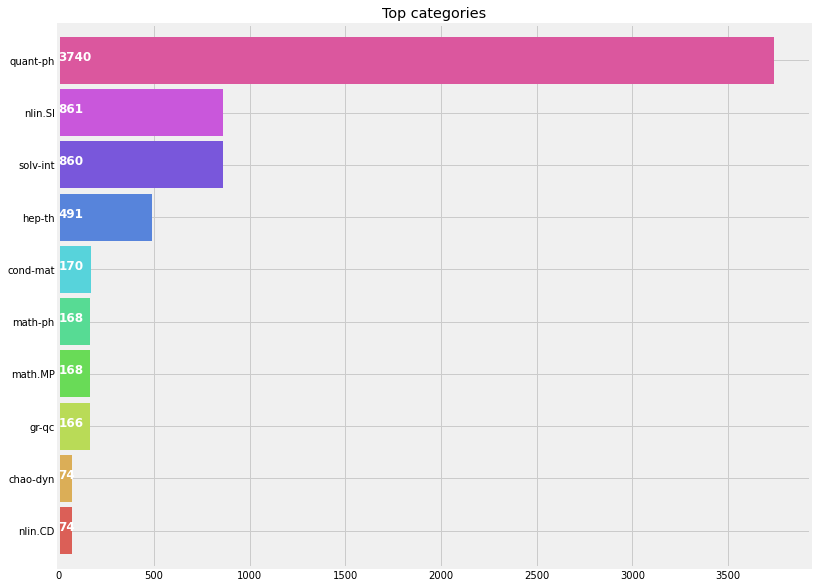

In [20]:
plt.subplots(figsize=(12,10))
list1 = []
for i in ww['categories']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top categories')
plt.show()

In [21]:
for i,j in zip(ww['categories'],ww.index):
    list2=[]
    list2=i
    list2.sort()
    ww.loc[j,'categories']=str(list2)
ww['categories'] = ww['categories'].str.strip('[]').str.replace("'",'')
ww['categories'] = ww['categories'].str.split(' ')

Now lets generate a list 'catList' with all possible unique categories mentioned in the dataset.



In [22]:
catList = []
for index, row in ww.iterrows():
    cats = row["categories"]
    
    for cat in cats:
        if cat not in catList:
            catList.append(cat)
catList[:10] #now we have a list with unique genres

['quant-ph',
 'cond-mat,',
 'hep-th,',
 'gr-qc,',
 'nucl-th,',
 'quant-ph,',
 'supr-con',
 'hep-ph,',
 'funct-an,',
 'math.FA,']

**One Hot Encoding for multiple labels**

In [23]:
def binary(cat_list):
    binaryList = []
    
    for cat in catList:
        if cat in cat_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [24]:
ww['cat_bin'] = ww['categories'].apply(lambda x: binary(x))
ww['cat_bin'].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: cat_bin, dtype: object

submitters

TypeError: ignored

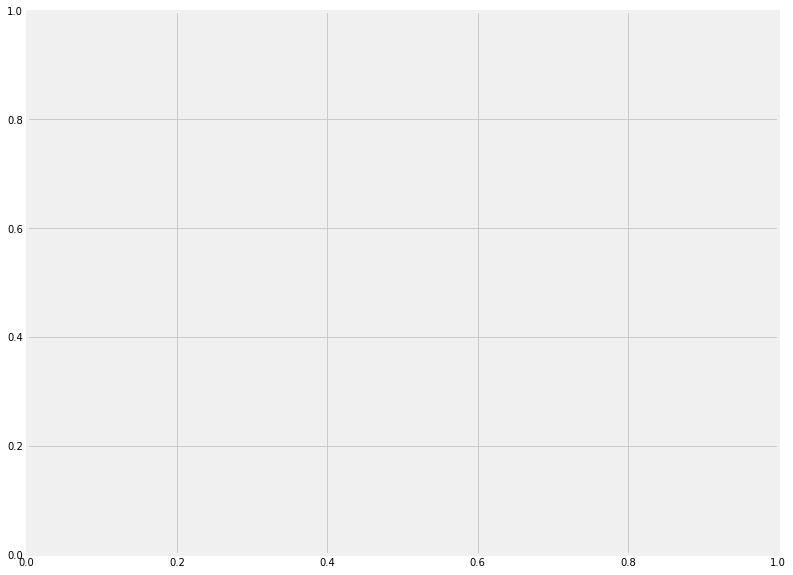

In [25]:
ww['submitter'] = ww['submitter'].str.strip('[]').str.replace("'",'')
ww['submitter'] = ww['submitter'].str.split(',')

plt.subplots(figsize=(12,10))
list1 = []
for i in ww['submitter']:
    list1(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top submitter')
plt.show()

## **Working with the authors_parsed Column**
 

In [26]:
ww['authors'] = ww['authors'].str.strip('[]').str.replace("'",'').str.replace('"','')
ww['authors'] = ww['authors'].str.split('and')

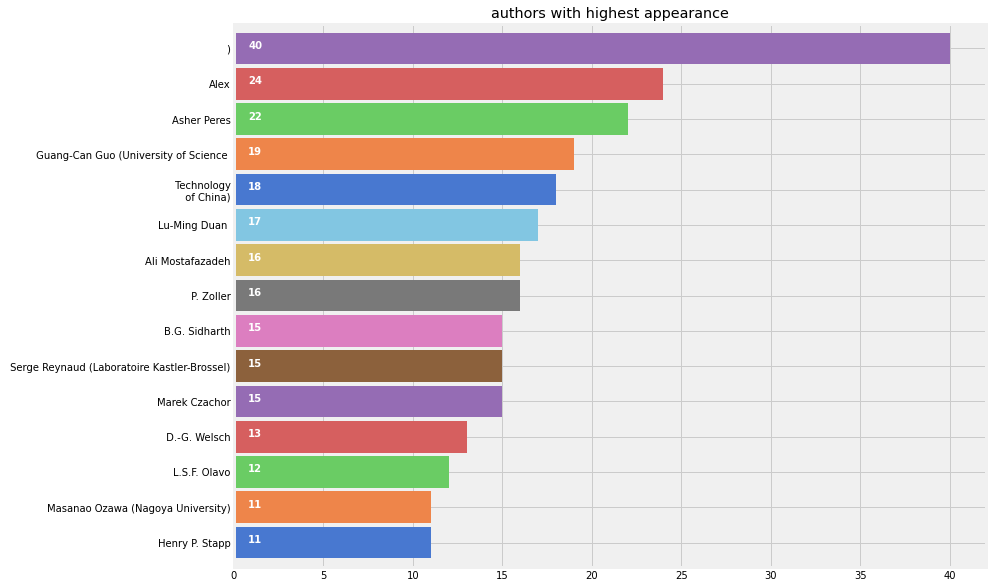

In [27]:
plt.subplots(figsize=(12,10))
list1=[]
for i in ww['authors']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('authors with highest appearance')
plt.show()

In [28]:
for i,j in zip(ww['authors'],ww.index):
    list2 = []
    list2 = i[:4]
    ww.loc[j,'authors'] = str(list2)
ww['authors'] = ww['authors'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace(')','')
ww['authors'] = ww['authors'].str.split('and')
for i,j in zip(ww['authors'],ww.index):
    list2 = []
    list2 = i
    list2.sort()
    ww.loc[j,'authors'] = str(list2)
ww['authors']=ww['authors'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace(')','')

In [29]:
authorsList = []
for index, row in ww.iterrows():
    authors = row["authors"]
    
    for i in authors:
        if i not in authorsList:
            authorsList.append(i)
    

In [30]:
def binary(authors_list):
    binaryList = []
    
    for authors in authorsList:
        if authors in authors_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [31]:
ww['authors_bin'] = ww['authors'].apply(lambda x: binary(x))
ww['authors_bin'].head()

0    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...
1    [0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, ...
2    [0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, ...
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...
4    [0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, ...
Name: authors_bin, dtype: object

## **Working with the title column**

In [32]:
#from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

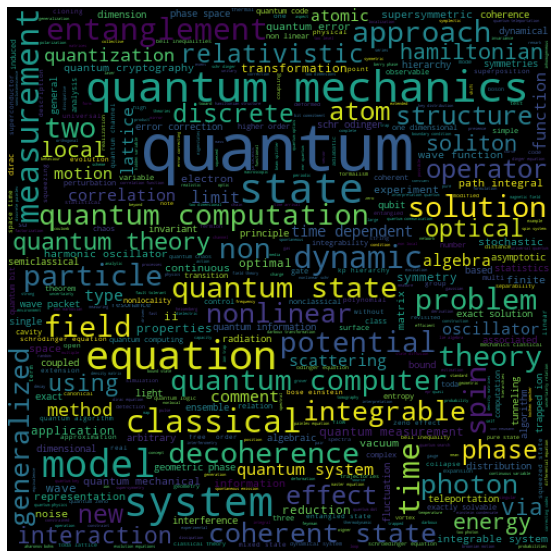

In [35]:
from wordcloud.wordcloud import STOPWORDS
from wordcloud import WordCloud 
plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')

words=ww['title'].dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=500, stopwords=STOPWORDS, max_font_size= 60,width=500,height=500)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Above is a wordcloud showing the major keywords or tags used for describing the ww.


In [36]:
ww['title'] = ww['title'].str.strip('[]').str.replace("'",'').str.replace('"','')
ww['title'] = ww['title'].str.split('.')
for i,j in zip(ww['title'],ww.index):
    list2 = []
    list2 = i
    ww.loc[j,'title'] = str(list2)
ww['title'] = ww['title'].str.strip('[]').str.replace("'",'').str.replace('"','')
ww['title'] = ww['title'].str.split('.')
for i,j in zip(ww['title'],ww.index):
    list2 = []
    list2 = i
    list2.sort()
    ww.loc[j,'title'] = str(list2)
ww['title'] = ww['title'].str.strip('[]').str.replace("'",'').str.replace('"','')
ww['title'] = ww['title'].str.split('.')

In [37]:
words_list = []
for index, row in ww.iterrows():
    genres = row["title"]
    
    for genre in genres:
        if genre not in words_list:
            words_list.append(genre)

In [38]:
def binary(words):
    binaryList = []
    for genre in words_list:
        if genre in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [39]:
ww['words_bin'] = ww['title'].apply(lambda x: binary(x))
#ww = ww[(ww['vote_average']!=0)] #removing the ww with 0 score and without drector names 
#ww = ww[ww['director']!='']
ww['words_bin'].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: words_bin, dtype: object

## Similarity between Articles

We will we using Cosine Similarity for finding the similarity between 2 Articles. 

In [47]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    a = ww.iloc[movieId1]
    b = ww.iloc[movieId2]
    
    genresA = a['cat_bin']
    genresB = b['cat_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    scoreA = a['authors_bin']
    scoreB = b['authors_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    '''
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = spatial.distance.cosine(directA, directB)
    '''
    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = spatial.distance.cosine(wordsA, wordsB)
    return genreDistance  + scoreDistance + wordsDistance

In [48]:
Similarity(0,2) #checking similarity between any 2 random ww

1.4909721896193777

In [49]:
print(ww.iloc[0])
print("\n")
print(ww.iloc[2])

id                                                 quant-ph/9502029
submitter                                              [Juan Pablo]
authors                                           W.H.Zurek,J.P.Paz
title                    [Quantum chaos: a decoherent definition, ]
journal-ref                                                    None
categories                                               [quant-ph]
abstract            We show that the rate of increase of von Neu...
authors_parsed       [['Zurek', 'W. H.', ''], ['Paz', 'J. P.', '']]
newcat                                                        quant
cat_bin           [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
authors_bin       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...
words_bin         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 0, dtype: object


id                                                 quant-ph/9503002
submitter                                          [Luanne Neumann]
authors                

In [50]:
new_id = list(range(0,ww.shape[0]))
ww['new_id']=new_id
ww=ww[['id','title','categories','cat_bin','newcat','authors_bin','new_id','words_bin']]
ww.head()

,id,title,categories,cat_bin,newcat,authors_bin,new_id,words_bin
0,quant-ph/9502029,"[Quantum chaos: a decoherent definition, ]",[quant-ph],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",quant,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...",0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,quant-ph/9503001,[Detecting Casimir Forces through a Tunneling ...,[quant-ph],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",quant,"[0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, ...",1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,quant-ph/9503002,[Quantum Electrodynamics at Large Distances I:...,[quant-ph],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",quant,"[0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, ...",2,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,quant-ph/9503003,[Comment on Quantum Backreaction on Classical ...,[quant-ph],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",quant,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...",3,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,quant-ph/9503004,[Quantum Langevin equation from forward--backw...,"[cond-mat,, hep-th,, quant-ph]","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",quant,"[0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, ...",4,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## **Score Predictor**

In [76]:
import operator

def predict_score(name):
    #name = input('Enter a article title: ')
    new_movie = ww[ww['id'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.title.values[0])
    def getNeighbors(baseMovie, K):
        distances = []
    
        for index, movie in ww.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    
    print('\nRecommended Articles: \n')
    for neighbor in neighbors:
       # avgRating = avgRating+ww.iloc[neighbor[0]][2]  
        print( ww.iloc[neighbor[0]][0]+" | Title: "+str(ww.iloc[neighbor[0]][1]).strip('[]')+" | Category: "+str(ww.iloc[neighbor[0]][2])+'\n'+" | similarity: "+str(Similarity(ww[ww['id'] == name].index[0],ww[ww['id'] == ww.iloc[neighbor[0]][0]].index[0])))
    
    print('\n')
    #avgRating = avgRating/K
    #print('The predicted rating for %s is: %f' %(new_movie['id'].values[0],avgRating))
    #print('The actual rating for %s is %f' %(new_movie['id'].values[0],new_movie['vote_average']))

In [77]:
predict_score('quant-ph/9502029')

Selected Movie:  ['Quantum chaos: a decoherent definition, ']

Recommended Articles: 

quant-ph/9807007 | Title: 'Algorithmic randomness, physical entropy, measurements, and the Demon of\\\\n  Choice' | Category: ['quant-ph']
 | similarity: 1.2155354594472638
quant-ph/9612037 | Title: 'Why We Dont Need Quantum Planetary Dynamics: Decoherence and the\\\\n  Correspondence Principle for Chaotic Systems' | Category: ['quant-ph']
 | similarity: 1.273726960797437
quant-ph/9707049 | Title: 'Continuous Error Correction' | Category: ['quant-ph']
 | similarity: 1.273726960797437
quant-ph/9811026 | Title: 'Quantum limit of decoherence: Environment induced superselection of\\\\n  energy eigenstates' | Category: ['quant-ph']
 | similarity: 1.273726960797437
quant-ph/9510021 | Title: 'Decoherence of Quantum Fields: Pointer States and Predictability' | Category: ['quant-ph']
 | similarity: 1.3066247547184635
quant-ph/9611049 | Title: 'A precision test of decoherence' | Category: ['quant-ph']
 | simil

In [78]:
predict_score('solv-int/9611003')

Selected Movie:  ['Some explicit solutions of the Lam\\\\\\\\e and Bourlet type equations']

Recommended Articles: 

solv-int/9612004 | Title: 'Riemannian Manifolds with Diagonal Metric,  The Lam\\\\\\\\e and Bourlet\\\\n  Systems' | Category: ['dg-ga,', 'hep-th,', 'math.DG,', 'nlin.SI,', 'solv-int']
 | similarity: 1.4904753346349318
solv-int/9803015 | Title: 'Charged Free Fermions, Vertex Operators and Classical Theory of\\\\n  Conjugate Nets' | Category: ['hep-th,', 'math.DG,', 'nlin.SI,', 'solv-int']
 | similarity: 1.4284523933505917
solv-int/9803010 | Title: 'The solution of the N=(0|2) superconformal f-Toda lattice' | Category: ['hep-th,', 'nlin.SI,', 'solv-int']
 | similarity: 1.6980808935009022
solv-int/9904004 | Title: 'Recurrent procedure for the determination of the Free Energy\\\\n  $\\\\\\\\epsilon^{2}$-expansion in the Topological String Theory' | Category: ['hep-th,', 'nlin.SI,', 'solv-int']
 | similarity: 1.404120428468876
solv-int/9709009 | Title: 'Motion of Curves and 